# Test 2 with cleaned DF
### Pymatch

Index(['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Age', 'Education_Graduation', 'Education_HigherEd',
       'Marital_Status_OnceMarried', 'Marital_Status_Single',
       'Marital_Status_Together', 'CustomerLength'],
      dtype='object')

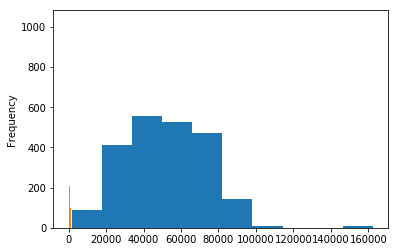

In [12]:
# Import packages
import pandas as pd
#import pandas_profiling
import numpy as np
%matplotlib inline

df = pd.read_csv('/Users/alentersakyan/Desktop/Project_3/Marketing.csv')
df.head(10)

## Pandas profile report for EDA

#pd.read_csv('/Users/alentersakyan/Desktop/Project_3/Marketing.csv').profile_report()

# Cleaning + Further EDA

## Get age

df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

df.columns

# Get age from dob
def getage(year_birth_col):
    return pd.to_datetime('2015-01').year - year_birth_col

df['Age'] = df['Year_Birth'].apply(getage)

df.Age.describe()

## Remove excess features

# df_reduced = df['Education', 'Marital_Status', 'Income', 'Kidhome',
#        'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
#        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
#        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
#        'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Complain', 'Response']

df.drop(['ID', 'Year_Birth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2'], axis=1, inplace=True)

df.columns

#df.profile_report()

### Education Cleaning

df['Education'].value_counts()

df['Education'].rename({"2n Cycle": "HigherEd", "Master": "HigherEd", "PhD": "HigherEd"},inplace=True)

edu_dict = {'HigherEd': ['2n Cycle', 'Master', 'PhD']}
dict2 = {i : k for k, v in edu_dict.items() for i in v}

dict2

df['Education'].replace(dict2, inplace=True)

# Education dummy
df = pd.get_dummies(df, columns=['Education'], drop_first = True)

### Income Cleaning

df['Income'].describe()

df = df[df['Income'] < 400000]

df['Income'].plot(kind='hist')

df['Income'].fillna(df['Income'].median())

### Kid at home Cleaning

df['Kidhome'].value_counts()

df['Kidhome'].replace(2,1,inplace=True)

### Marital Status

df['Marital_Status'].value_counts()

df['Marital_Status'].replace('Alone', 'Single', inplace=True)

df['Marital_Status'].replace('YOLO', 'Single', inplace=True)

df['Marital_Status'].replace('Absurd', 'Single', inplace=True)

df['Marital_Status'].replace('Divorced', 'OnceMarried', inplace=True)
df['Marital_Status'].replace('Widow', 'OnceMarried', inplace=True)

# Get dummies, drop first (married)... Make sure to be clear on this interpretation later..
df = pd.get_dummies(df, columns=['Marital_Status'], drop_first = True)

### Teen at home

df['Teenhome'].value_counts()

df['Teenhome'].replace(2,1,inplace=True)

### Amt Purchased

df.MntWines.plot(kind='hist')

df.columns

### Date they became a customer-- translate to years since today

df.Dt_Customer = pd.to_datetime(df.Dt_Customer)

df.Dt_Customer

# Get length of being a customer (from dt_customer - 2015-01)
def getCustomerLength(customer_length_col):
    return pd.to_datetime('2015-01') - customer_length_col

df['CustomerLength'] = df['Dt_Customer'].apply(getCustomerLength)

df['CustomerLength'].describe()

type(pd.to_datetime('today'))

pd.to_datetime('2015-01') - df['Dt_Customer'][0]

df['Dt_Customer'][0]

## Final df, pickle

df.drop('Complain', axis =1 , inplace=True)

df.columns

# import pickle
# with open ('df_cleaned.pickle', 'wb') as to_write:
#     pickle.dump(df, to_write)

# # # To load pickle back in
# # with open('df_cleaned.pickle','rb') as read_file:
# #       df = pickle.load(read_file)

# !ls

In [13]:
df.head()

,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,Response,Age,Education_Graduation,Education_HigherEd,Marital_Status_OnceMarried,Marital_Status_Single,Marital_Status_Together,CustomerLength
0,58138.0,0,0,2012-09-04,58,635,88,546,172,88,...,4,7,1,58,1,0,0,1,0,849 days
1,46344.0,1,1,2014-03-08,38,11,1,6,2,1,...,2,5,0,61,1,0,0,1,0,299 days
2,71613.0,0,0,2013-08-21,26,426,49,127,111,21,...,10,4,0,50,1,0,0,0,1,498 days
3,26646.0,1,0,2014-02-10,26,11,4,20,10,3,...,4,6,0,31,1,0,0,0,1,325 days
4,58293.0,1,0,2014-01-19,94,173,43,118,46,27,...,6,5,0,34,0,1,0,0,0,347 days


In [14]:
import datetime as dt

df['CustomerLength'] = df['CustomerLength'].dt.days

In [15]:
df

,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,Response,Age,Education_Graduation,Education_HigherEd,Marital_Status_OnceMarried,Marital_Status_Single,Marital_Status_Together,CustomerLength
0,58138.0,0,0,2012-09-04,58,635,88,546,172,88,...,4,7,1,58,1,0,0,1,0,849
1,46344.0,1,1,2014-03-08,38,11,1,6,2,1,...,2,5,0,61,1,0,0,1,0,299
2,71613.0,0,0,2013-08-21,26,426,49,127,111,21,...,10,4,0,50,1,0,0,0,1,498
3,26646.0,1,0,2014-02-10,26,11,4,20,10,3,...,4,6,0,31,1,0,0,0,1,325
4,58293.0,1,0,2014-01-19,94,173,43,118,46,27,...,6,5,0,34,0,1,0,0,0,347
5,62513.0,0,1,2013-09-09,16,520,42,98,0,42,...,10,6,0,48,0,1,0,0,1,479
6,55635.0,0,1,2012-11-13,34,235,65,164,50,49,...,7,6,0,44,1,0,1,0,0,779
7,33454.0,1,0,2013-05-08,32,76,10,56,3,1,...,4,8,0,30,0,1,0,0,0,603
8,30351.0,1,0,2013-06-06,19,14,0,24,3,3,...,2,9,1,41,0,1,0,0,1,574
9,5648.0,1,1,2014-03-13,68,28,0,6,1,1,...,0,20,0,65,0,1,0,0,1,294


In [59]:
test2 = df[df['Response'] == 1] #smaller group that bought something
control2 = df[df['Response'] == 0] #larger group that did not buy something

In [63]:
m2 = Matcher(test,control, yvar='Response', exclude=['Education_Graduation', 'Education_HigherEd',\
                                                    'Marital_Status_OnceMarried', 'Marital_Status_Single',\
                                                    'Marital_Status_Together', 'Kidhome', 'Teenhome', 'Dt_Customer'])

Formula:
Response ~ Age+CustomerLength+Income+MntFishProducts+MntFruits+MntGoldProds+MntMeatProducts+MntSweetProducts+MntWines+NumCatalogPurchases+NumDealsPurchases+NumStorePurchases+NumWebPurchases+NumWebVisitsMonth+Recency
n majority: 1882
n minority: 333


In [64]:
np.random.seed(20170925)
m2.fit_scores(balance=True, nmodels=100)

Fitting Models on Balanced Samples: 100\100
Average Accuracy: 75.84%


In [65]:
m2.predict_scores()

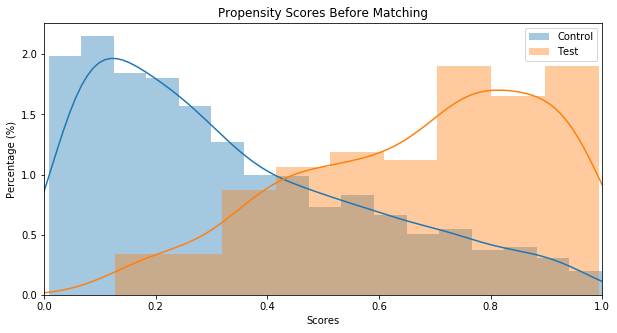

In [66]:
m2.plot_scores()

In [67]:
m2.balanced_sample()

,Age,CustomerLength,Dt_Customer,Education_Graduation,Education_HigherEd,Income,Kidhome,Marital_Status_OnceMarried,Marital_Status_Single,Marital_Status_Together,...,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Teenhome,scores
2193,39,520,2013-07-30,1,0,5305.0,0,0,0,0,...,12,0,0,0,1,13,12,0,1,0.806548
2088,35,454,2013-10-04,1,0,30828.0,1,0,1,0,...,16,1,2,4,1,3,16,0,0,0.245094
389,63,246,2014-04-30,1,0,28332.0,0,0,0,0,...,14,1,1,4,2,2,58,0,0,0.027548
1392,68,256,2014-04-20,0,1,66000.0,0,0,0,1,...,244,3,1,5,1,1,36,0,0,0.113835
1476,59,642,2013-03-30,0,1,76542.0,0,0,0,1,...,794,8,1,10,4,2,91,0,0,0.436870
1031,43,511,2013-08-08,1,0,22063.0,1,0,0,0,...,7,0,2,3,2,7,43,0,0,0.240866
1472,40,680,2013-02-20,1,0,33249.0,1,0,1,0,...,6,1,2,3,2,6,11,0,0,0.620804
1178,34,853,2012-08-31,0,1,42021.0,1,0,0,1,...,393,1,5,6,10,9,34,0,0,0.814562
1432,37,433,2013-10-25,0,1,34043.0,1,0,0,1,...,20,0,1,2,2,9,97,0,0,0.100175
565,40,259,2014-04-17,0,1,44319.0,1,0,0,0,...,26,0,2,3,2,5,18,0,1,0.208210


/anaconda3/lib/python3.7/site-packages/pymatch/Matcher.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.matched_data['match_id'] = match_ids
/anaconda3/lib/python3.7/site-packages/pymatch/Matcher.py:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.matched_data['record_id'] = self.matched_data.index


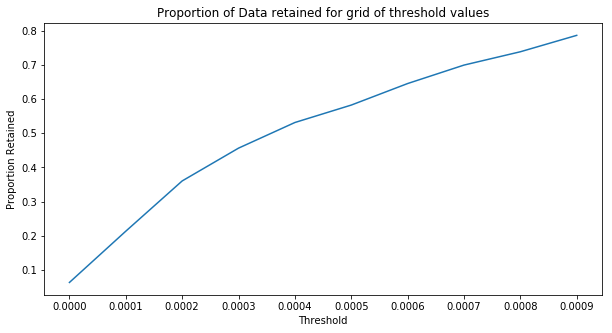

In [72]:
m2.tune_threshold(method='random')

In [90]:
m2.match(method="min", nmatches=1, threshold=0.009) #.00009
m2.record_frequency()

/anaconda3/lib/python3.7/site-packages/pymatch/Matcher.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.matched_data['match_id'] = match_ids
/anaconda3/lib/python3.7/site-packages/pymatch/Matcher.py:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.matched_data['record_id'] = self.matched_data.index


,freq,n_records
0,1,491
1,2,51
2,3,10
3,4,6
4,5,1
5,6,1
6,8,1


In [91]:
m2.assign_weight_vector

<bound method Matcher.assign_weight_vector of <pymatch.Matcher.Matcher object at 0x1c2d77dd30>>

In [92]:
m2.matched_data.sort_values("match_id")

,Age,CustomerLength,Dt_Customer,Education_Graduation,Education_HigherEd,Income,Kidhome,Marital_Status_OnceMarried,Marital_Status_Single,Marital_Status_Together,...,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Teenhome,scores,match_id,record_id
0,58,849,2012-09-04,1,0,58138.0,0,0,1,0,...,3,4,8,7,58,1,0,0.967581,0,0
366,35,612,2013-04-29,1,0,80011.0,0,0,0,0,...,2,5,8,4,3,0,1,0.968037,0,366
1,41,574,2013-06-06,0,1,30351.0,1,0,0,1,...,1,2,3,9,19,1,0,0.623505,1,1
672,41,574,2013-06-06,0,1,30351.0,1,0,0,1,...,1,2,3,9,19,0,0,0.623505,1,672
2,69,768,2012-11-24,0,1,82800.0,0,0,1,0,...,1,12,7,3,23,1,0,0.624211,2,2
894,35,846,2012-09-07,0,0,25965.0,0,0,0,0,...,1,3,2,8,29,0,0,0.623658,2,894
3,63,794,2012-10-29,0,1,46610.0,0,1,0,0,...,6,6,4,6,8,1,1,0.589690,3,3
1620,44,585,2013-05-26,1,0,69930.0,0,0,0,1,...,1,12,4,3,21,0,0,0.589871,3,1620
4,72,699,2013-02-01,0,1,48948.0,0,1,0,0,...,2,5,7,6,53,1,0,0.761696,4,4
2025,29,686,2013-02-14,1,0,39146.0,1,0,1,0,...,3,4,4,8,1,0,0,0.761766,4,2025


/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


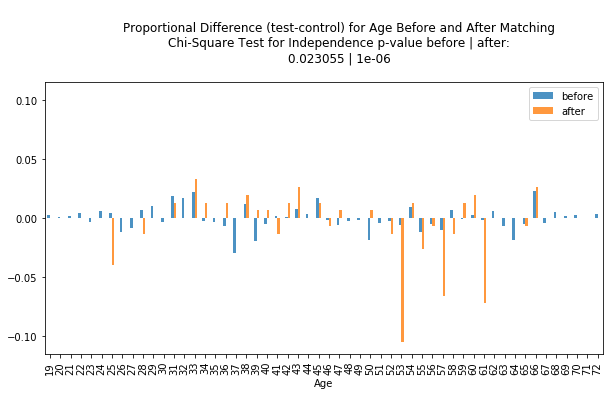

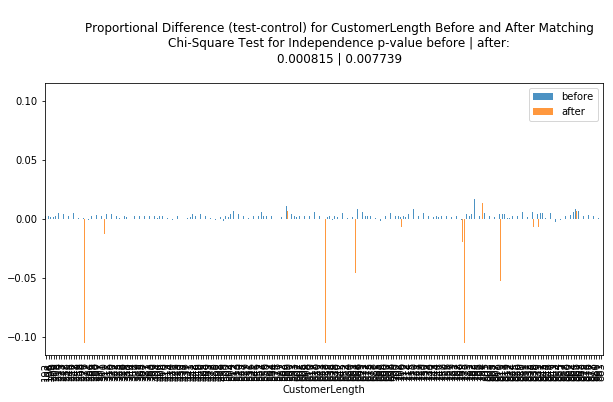

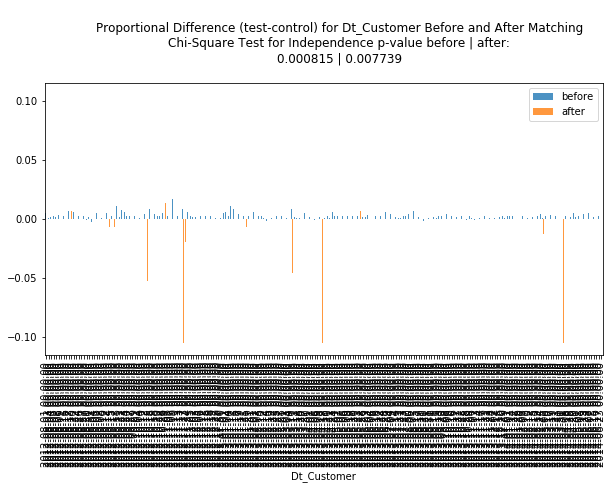

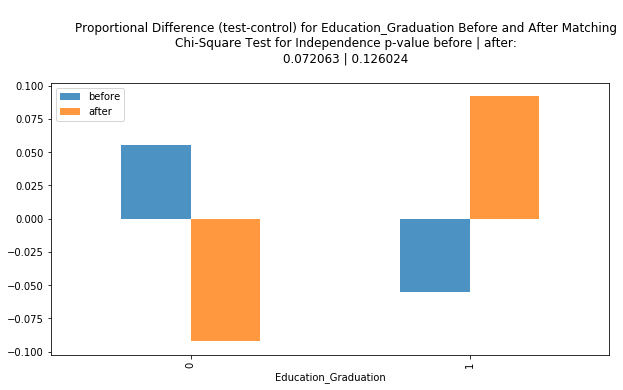

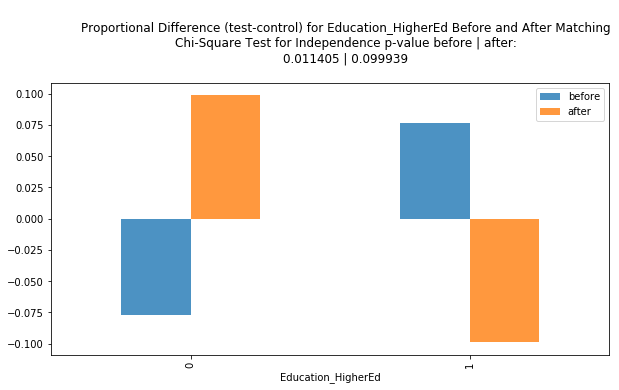

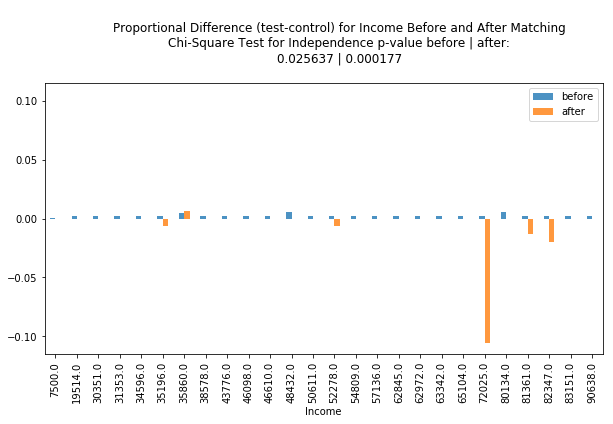

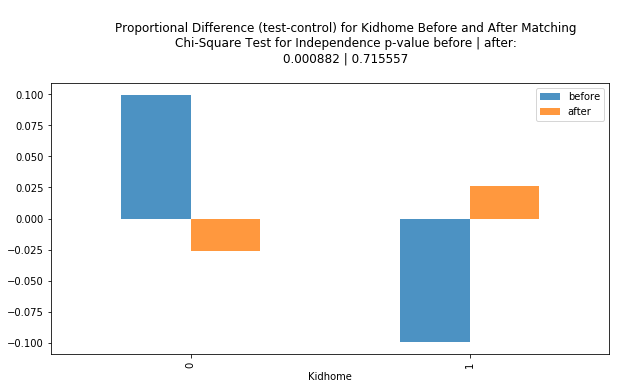

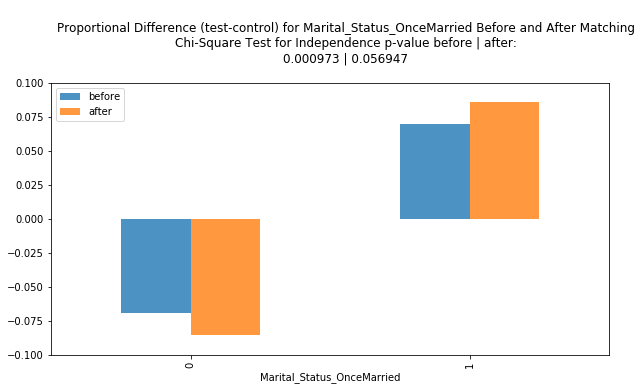

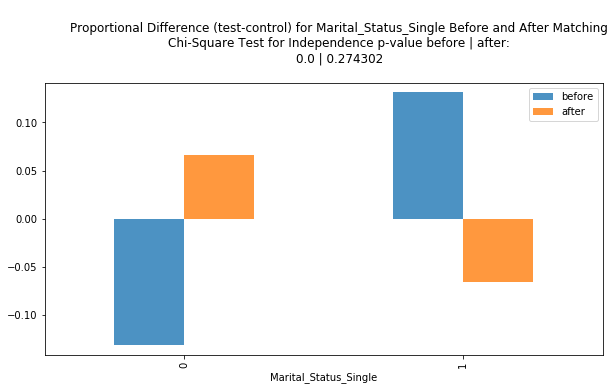

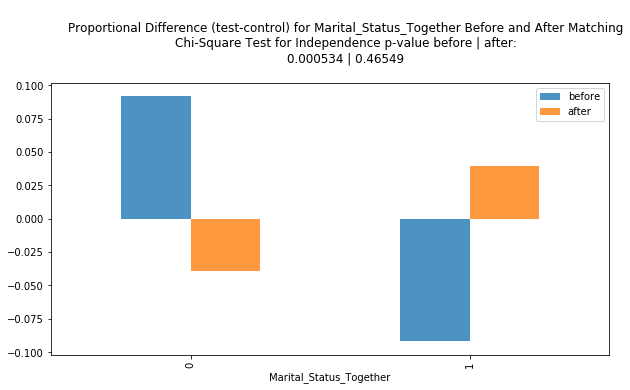

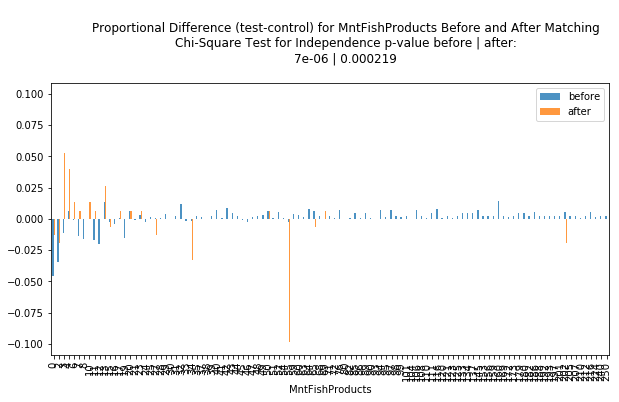

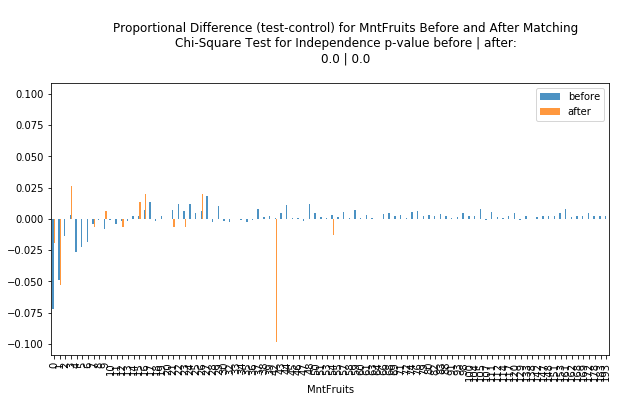

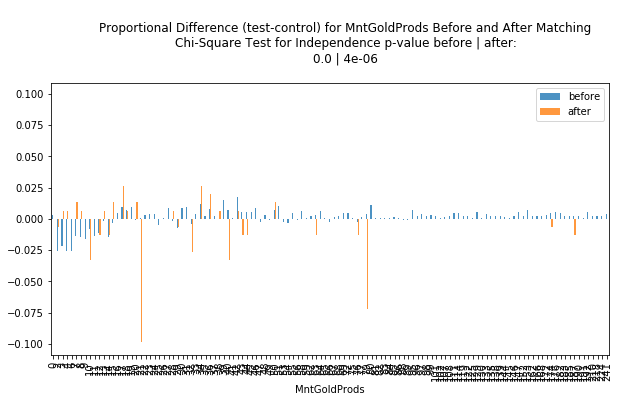

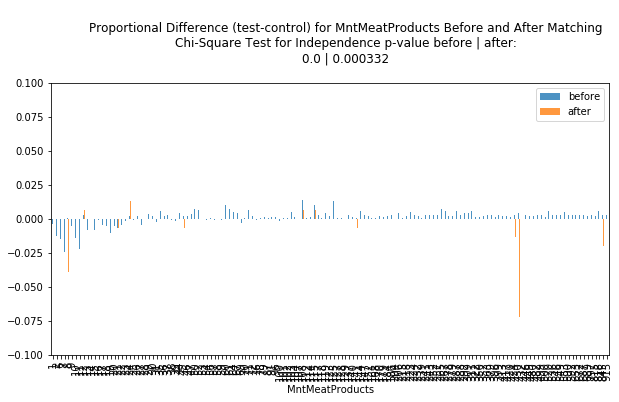

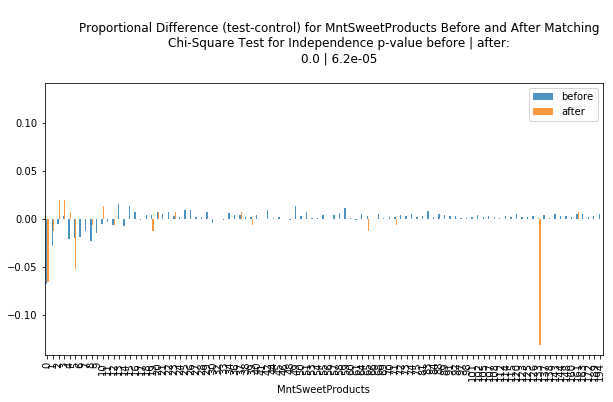

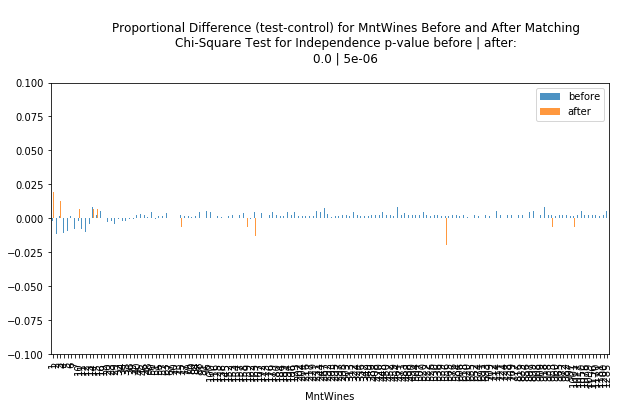

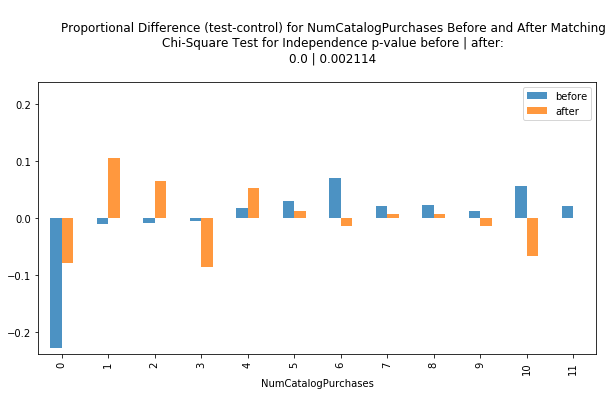

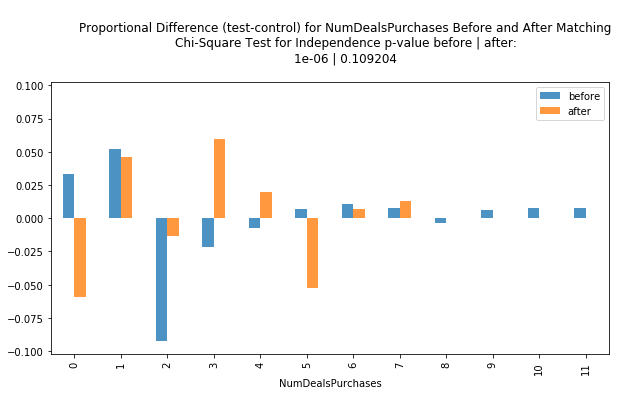

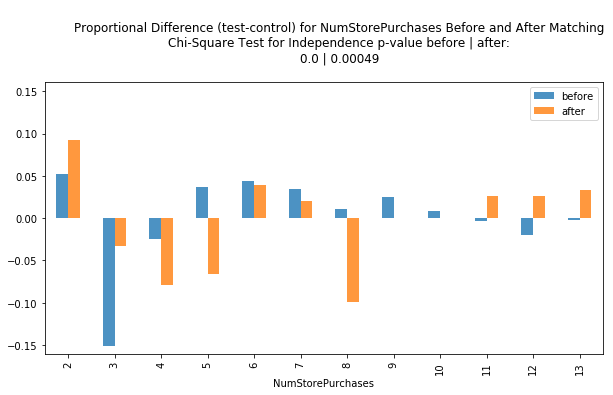

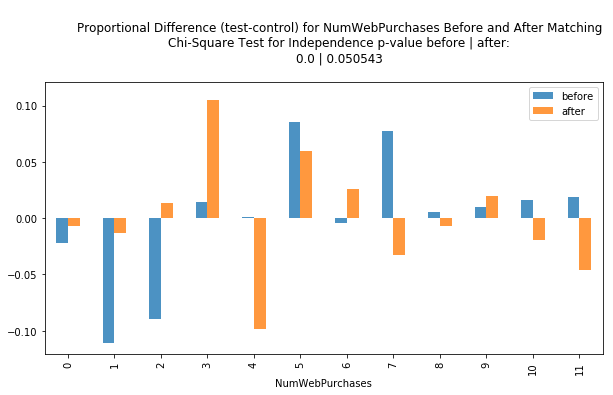

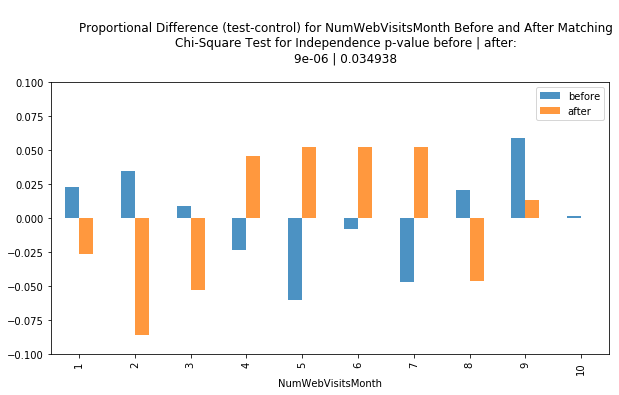

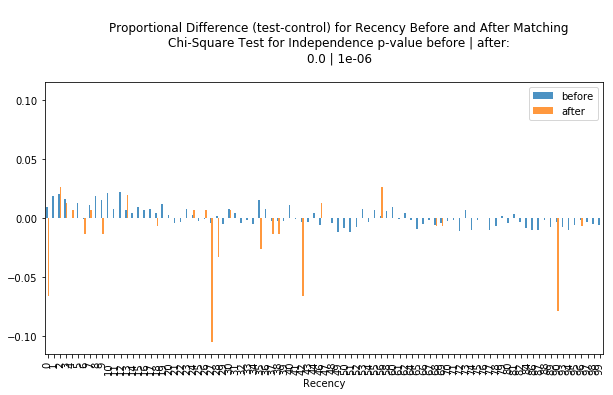

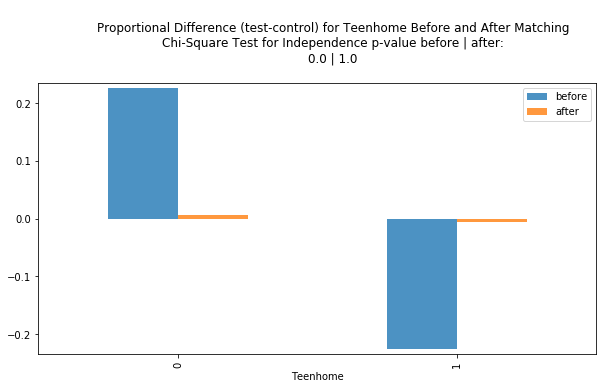

In [93]:
categorical_results = m.compare_categorical(return_table=True)

In [94]:
categorical_results

,var,before,after
0,Age,0.023055,0.000001
1,CustomerLength,0.000815,0.007739
2,Dt_Customer,0.000815,0.007739
3,Education_Graduation,0.072063,0.126024
4,Education_HigherEd,0.011405,0.099939
5,Income,0.025637,0.000177
6,Kidhome,0.000882,0.715557
7,Marital_Status_OnceMarried,0.000973,0.056947
8,Marital_Status_Single,0.000000,0.274302
9,Marital_Status_Together,0.000534,0.465490


In [89]:
cc = m2.compare_continuous(return_table=True)

KeyError: "['var' 'ks_before' 'ks_after' 'grouped_chisqr_before'\n 'grouped_chisqr_after' 'std_median_diff_before' 'std_median_diff_after'\n 'std_mean_diff_before' 'std_mean_diff_after'] not in index"

In [86]:
cc

# Pymatch on df from above (cleaned)

In [18]:
test = df[df['Response'] == 1] #smaller group that bought something
control = df[df['Response'] == 0] #larger group that did not buy something

In [21]:
control['Response'].value_counts()

0    1882
Name: Response, dtype: int64

In [26]:
m = Matcher(test,control, yvar='Response')

Formula:
Response ~ Age+CustomerLength+Dt_Customer+Education_Graduation+Education_HigherEd+Income+Kidhome+Marital_Status_OnceMarried+Marital_Status_Single+Marital_Status_Together+MntFishProducts+MntFruits+MntGoldProds+MntMeatProducts+MntSweetProducts+MntWines+NumCatalogPurchases+NumDealsPurchases+NumStorePurchases+NumWebPurchases+NumWebVisitsMonth+Recency+Teenhome
n majority: 1882
n minority: 333


In [27]:
np.random.seed(20170925)
m.fit_scores(balance=True, nmodels=100)

Fitting Models on Balanced Samples: 1\100

/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:879: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:879: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


Fitting Models on Balanced Samples: 100\100
Average Accuracy: 93.73%


In [29]:
# Predict propensity scores
# This assigns a propensity score to each record in the dataset
m.predict_scores()

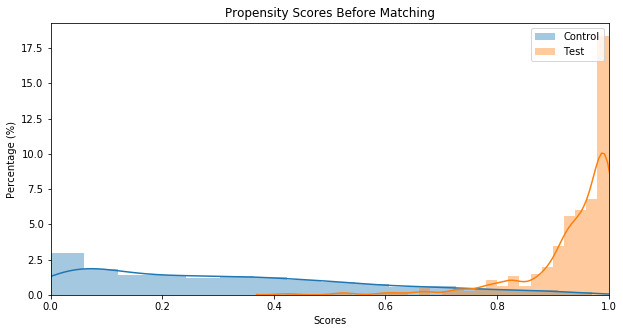

In [30]:
# Plot the p score distribution
# This shows a separability-- the Control (people who did not buy) are much lower propensity of course
# Test have high propensity (estimated probability of defaulting given the features we isolated in the data)
m.plot_scores()

In [52]:
m.balanced_sample()

,Age,CustomerLength,Dt_Customer,Education_Graduation,Education_HigherEd,Income,Kidhome,Marital_Status_OnceMarried,Marital_Status_Single,Marital_Status_Together,...,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Teenhome,scores
985,59,585,2013-05-26,0,1,62058.0,0,0,0,0,...,301,1,4,7,6,6,52,0,1,0.168675
2147,50,341,2014-01-25,1,0,59686.0,0,0,1,0,...,89,1,1,6,4,4,78,0,1,0.020000
956,42,643,2013-03-29,1,0,67432.0,0,0,0,0,...,432,5,2,4,8,4,69,0,1,0.340000
1563,50,206,2014-06-09,1,0,77343.0,0,0,0,0,...,227,4,1,9,3,1,28,0,0,0.110000
1477,28,784,2012-11-08,1,0,18227.0,1,0,0,1,...,1,1,1,2,0,8,21,0,0,0.570000
1473,56,690,2013-02-10,0,1,26887.0,0,0,0,0,...,6,0,1,3,1,6,27,0,1,0.500009
2088,35,454,2013-10-04,1,0,30828.0,1,0,1,0,...,16,1,2,4,1,3,16,0,0,0.180091
541,48,855,2012-08-29,1,0,75702.0,1,0,0,1,...,650,6,5,11,4,8,77,0,1,0.409207
2154,31,374,2013-12-23,1,0,90000.0,0,0,0,0,...,675,8,1,5,4,1,91,0,0,0.280000
870,63,576,2013-06-04,1,0,84574.0,0,0,1,0,...,387,11,1,11,9,5,72,0,0,0.719788


/anaconda3/lib/python3.7/site-packages/pymatch/Matcher.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.matched_data['match_id'] = match_ids
/anaconda3/lib/python3.7/site-packages/pymatch/Matcher.py:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.matched_data['record_id'] = self.matched_data.index


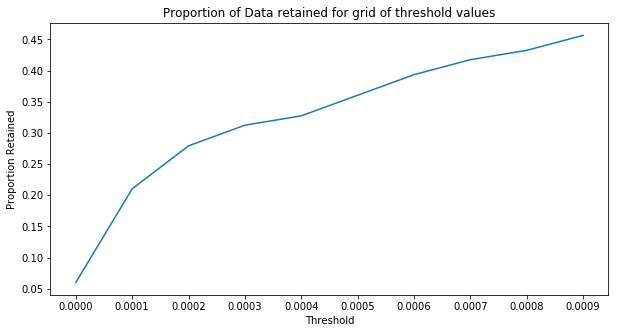

In [55]:
m.tune_threshold(nmatches=1,method='random')
# We still lose half our data with .0009 threshold...

In [40]:
m.match(method="min", nmatches=3, threshold=0.0009)
m.record_frequency()


/anaconda3/lib/python3.7/site-packages/pymatch/Matcher.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.matched_data['match_id'] = match_ids
/anaconda3/lib/python3.7/site-packages/pymatch/Matcher.py:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.matched_data['record_id'] = self.matched_data.index


,freq,n_records
0,1,396
1,2,23
2,3,17
3,4,2
4,5,5
5,6,4
6,7,2
7,10,1
8,12,2
9,15,1


In [41]:
m.assign_weight_vector()

In [58]:
m.matched_data.sort_values("match_id")

,Age,CustomerLength,Dt_Customer,Education_Graduation,Education_HigherEd,Income,Kidhome,Marital_Status_OnceMarried,Marital_Status_Single,Marital_Status_Together,...,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Teenhome,scores,match_id,record_id
1,41,574,2013-06-06,0,1,30351.0,1,0,0,1,...,1,2,3,9,19,1,0,0.895000,1,1
672,41,574,2013-06-06,0,1,30351.0,1,0,0,1,...,1,2,3,9,19,0,0,0.895000,1,672
2,69,768,2012-11-24,0,1,82800.0,0,0,1,0,...,1,12,7,3,23,1,0,0.970000,2,2
639,53,775,2012-11-17,1,0,72025.0,0,0,0,1,...,1,8,4,3,27,0,0,0.969872,2,639
3,63,794,2012-10-29,0,1,46610.0,0,1,0,0,...,6,6,4,6,8,1,1,0.919804,3,3
408,55,527,2013-07-23,0,1,47823.0,0,0,1,0,...,2,3,2,8,0,0,1,0.920000,3,408
9,33,546,2013-07-04,0,1,75777.0,0,0,1,0,...,1,11,3,1,12,1,0,0.970000,9,9
639,53,775,2012-11-17,1,0,72025.0,0,0,0,1,...,1,8,4,3,27,0,0,0.969872,9,639
11,36,288,2014-03-19,0,1,88194.0,0,0,1,0,...,1,10,11,5,19,1,1,0.945885,11,11
533,57,867,2012-08-17,1,0,61074.0,0,0,0,0,...,7,8,11,7,37,0,1,0.945794,11,533


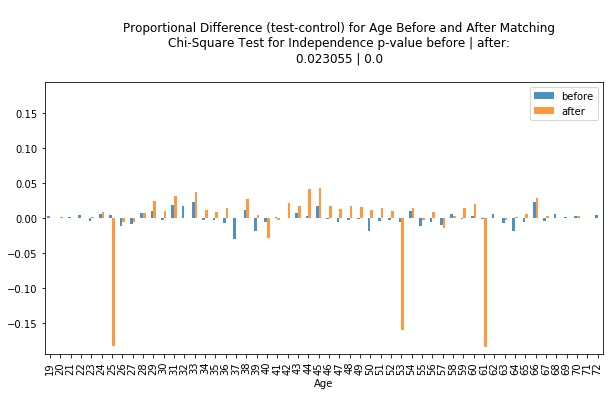

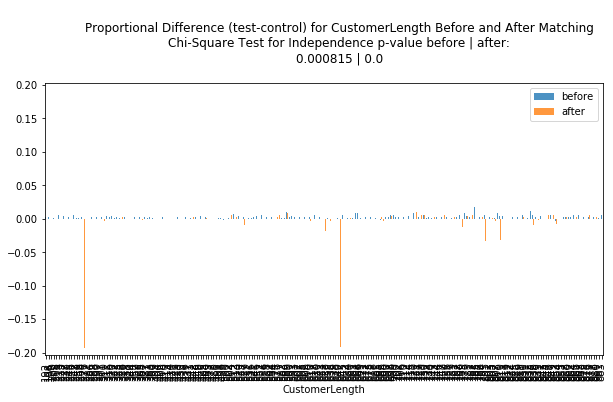

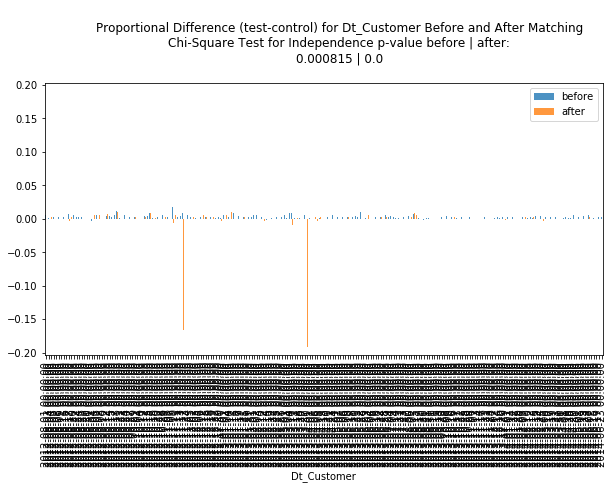

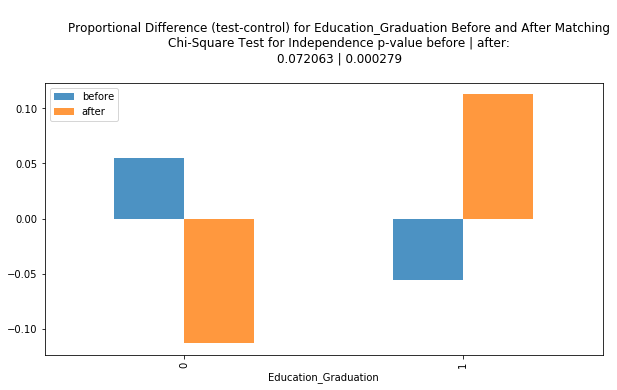

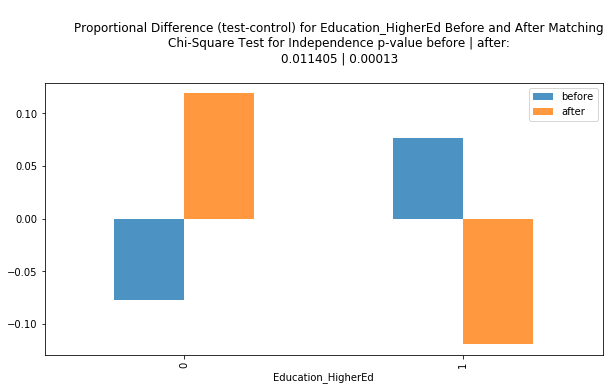

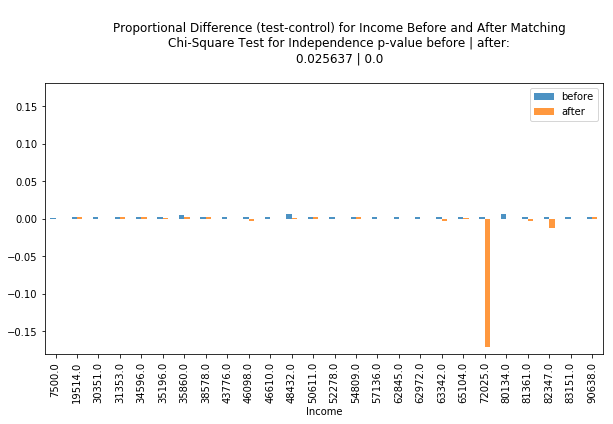

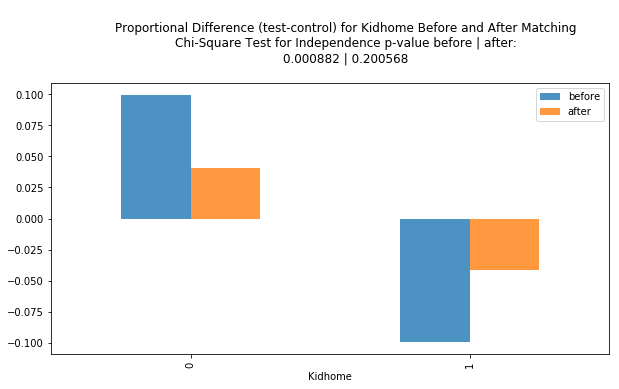

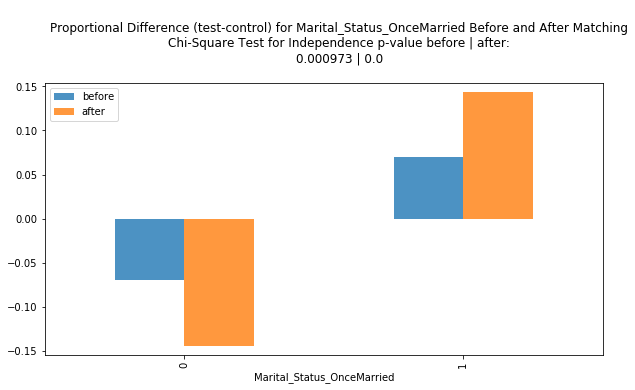

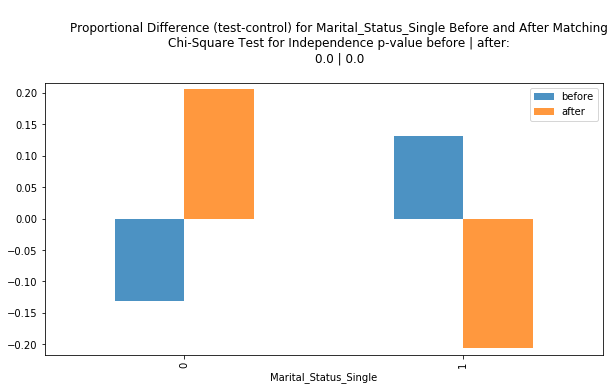

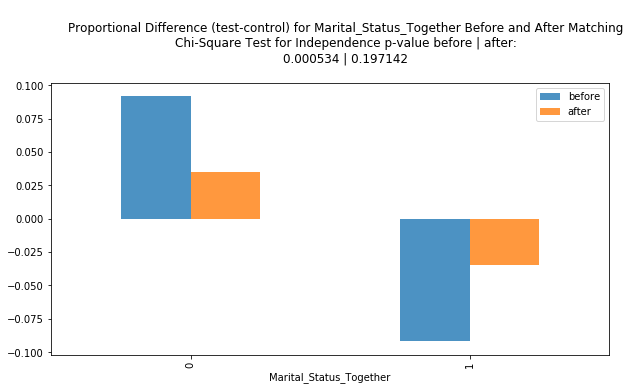

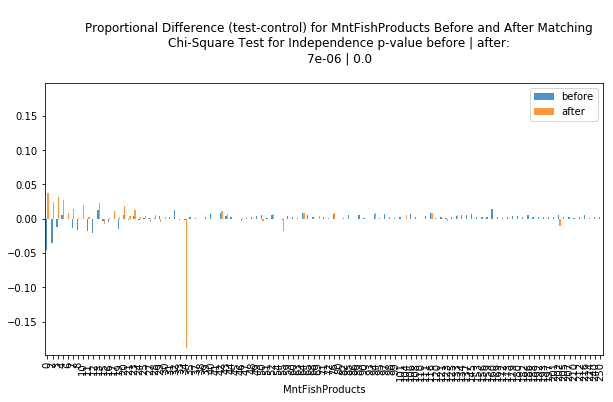

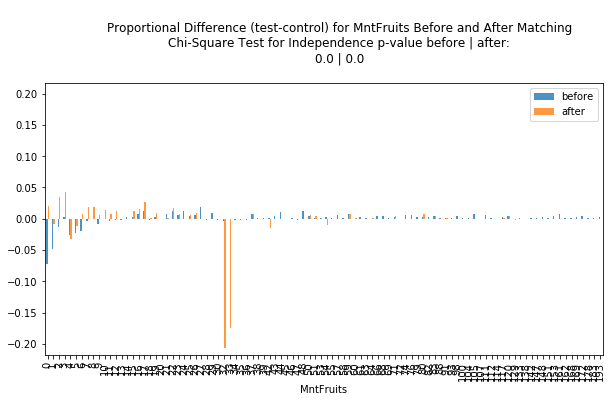

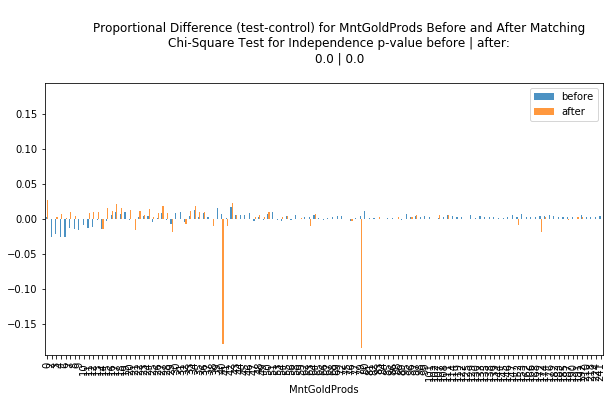

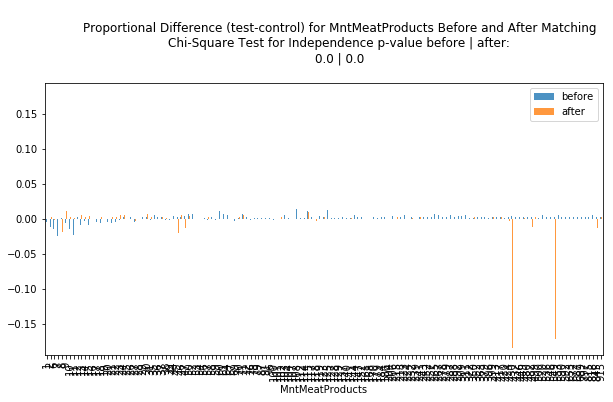

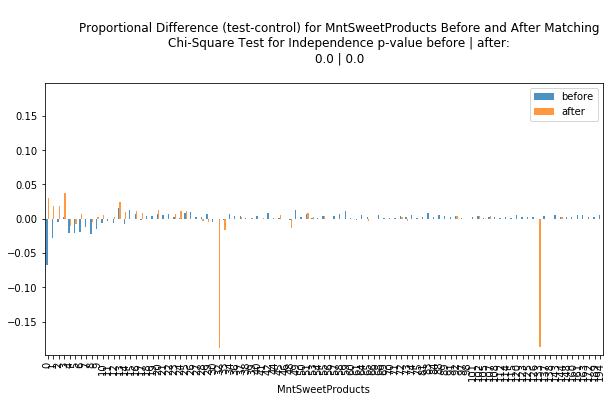

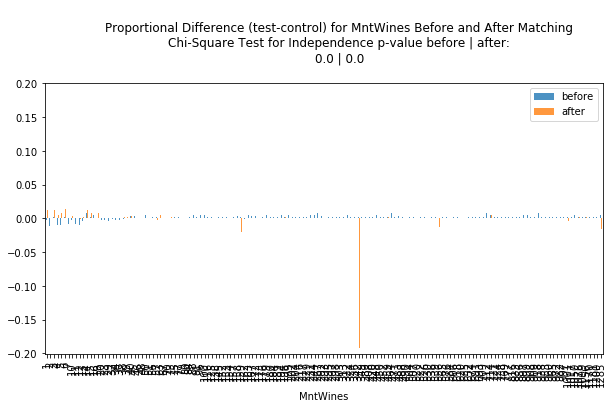

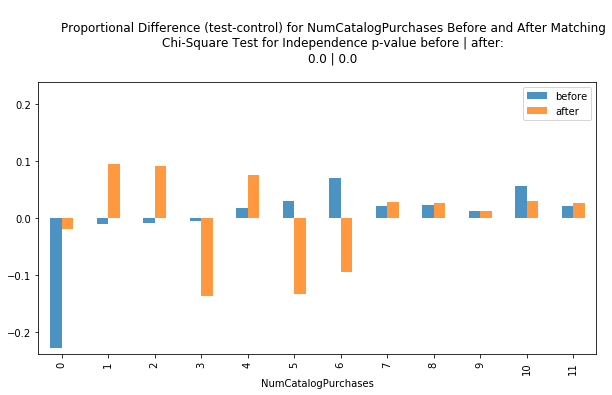

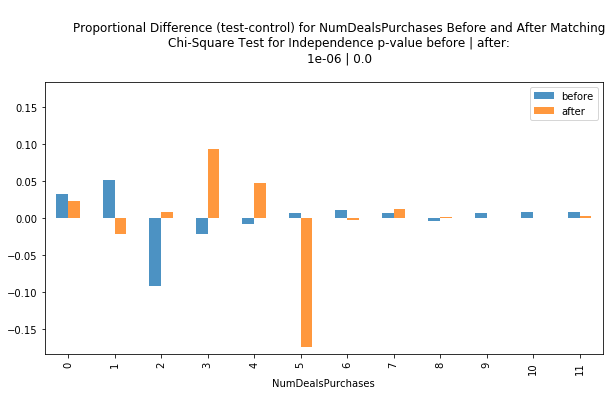

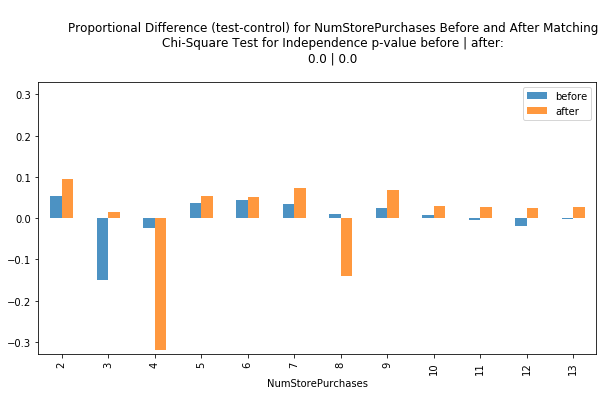

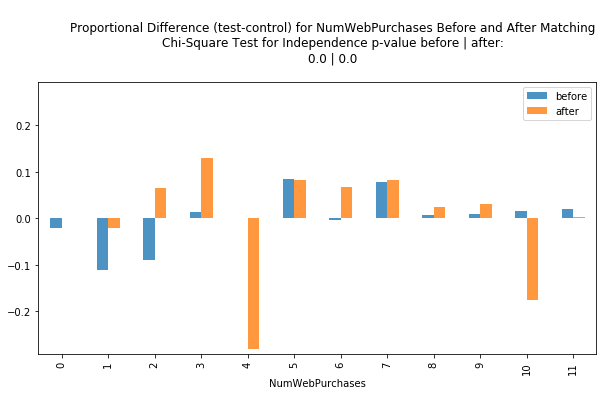

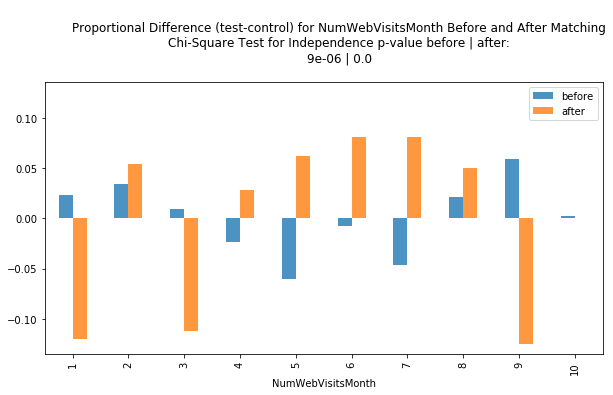

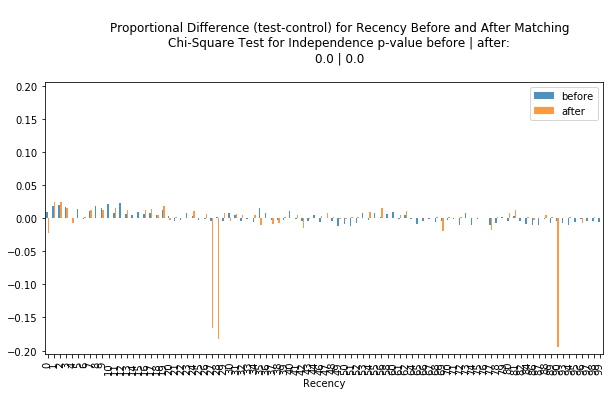

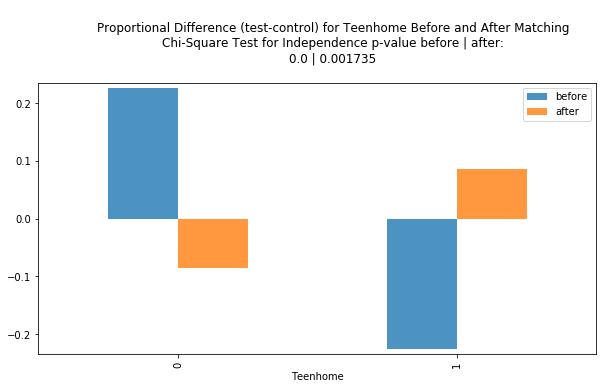

In [43]:
categorical_results = m.compare_categorical(return_table=True)

In [44]:
cont_results = m.compare_continuous(return_table=True)

KeyError: "['var' 'ks_before' 'ks_after' 'grouped_chisqr_before'\n 'grouped_chisqr_after' 'std_median_diff_before' 'std_median_diff_after'\n 'std_mean_diff_before' 'std_mean_diff_after'] not in index"

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from pymatch.Matcher import Matcher
import numpy as np

In [17]:
pd.__version__

'0.23.4'

In [23]:
# df_test = pd.read_csv('/Users/alentersakyan/Desktop/Project_3/Marketing.csv')
# df_test.head(10)

In [24]:
# test = df_test[df_test['Response'] == 1] #smaller group that bought something
# control = df_test[df_test['Response'] == 0] #larger group that did not buy something

In [25]:
# exclude_from_matcher = ['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',\
#                        'AcceptedCmp1','AcceptedCmp2','Complain','Z_CostContact','Z_Revenue', 'ID']
# m = Matcher(test,control, yvar='Response', exclude=exclude_from_matcher)

In [24]:
np.random.seed(20170925)
m.fit_scores(balance=True, nmodels=100)

Static column dropped: Z_Revenue

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:879: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:879: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = sel

Static column dropped: Z_Revenuetact100\100
Average Accuracy: 94.21%


In [26]:
m.predict_scores()

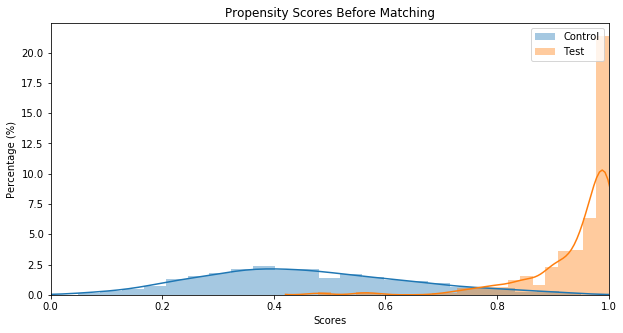

In [27]:
m.plot_scores()

/anaconda3/lib/python3.7/site-packages/pymatch/Matcher.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.matched_data['match_id'] = match_ids
/anaconda3/lib/python3.7/site-packages/pymatch/Matcher.py:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.matched_data['record_id'] = self.matched_data.index


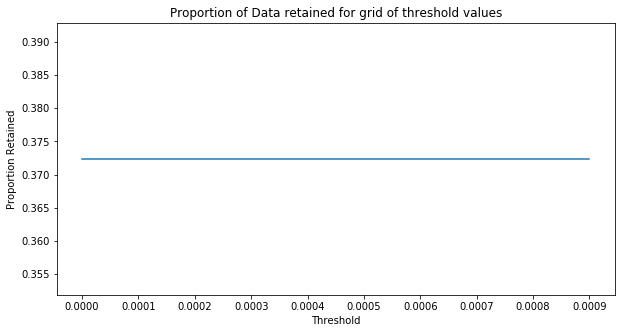

In [28]:
m.tune_threshold(method='random')


In [29]:
m.match(method="min", nmatches=1, threshold=0.0001)

In [31]:
m.record_frequency()

,freq,n_records
0,1,338
1,2,9
2,3,3
3,4,4
4,8,2
5,9,1
6,11,1
7,12,2
8,225,1


In [32]:
m.assign_weight_vector()

In [35]:
m.matched_data.sort_values("match_id").head(10)
# Check match_id and weight vector in df

,record_id,weight,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Dt_Customer,Education,...,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Teenhome,Year_Birth,Z_CostContact,Z_Revenue,scores,match_id
0,0,1.000000,0,0,0,0,0,0,2012-09-04,Graduation,...,8,7,58,1,0,1957,3,11,1.00,0
367,653,0.004444,0,0,0,0,0,0,2012-11-17,Graduation,...,4,3,27,0,0,1962,3,11,0.95,0
1,1,1.000000,0,0,0,0,0,0,2013-06-06,PhD,...,3,9,19,1,0,1974,3,11,0.89,1
335,403,0.125000,0,0,0,0,0,0,2014-02-25,Graduation,...,3,1,18,0,0,1987,3,11,0.89,1
2,2,1.000000,1,0,0,0,1,0,2012-11-24,PhD,...,7,3,23,1,0,1946,3,11,0.99,2
368,653,0.004444,0,0,0,0,0,0,2012-11-17,Graduation,...,4,3,27,0,0,1962,3,11,0.95,2
641,1967,0.250000,0,0,0,0,0,0,2013-01-25,PhD,...,10,8,24,0,1,1963,3,11,0.86,3
3,3,1.000000,0,0,0,0,0,0,2012-10-29,PhD,...,4,6,8,1,2,1952,3,11,0.86,3
369,653,0.004444,0,0,0,0,0,0,2012-11-17,Graduation,...,4,3,27,0,0,1962,3,11,0.95,4
4,4,1.000000,0,0,1,0,0,0,2013-02-01,PhD,...,7,6,53,1,0,1943,3,11,1.00,4


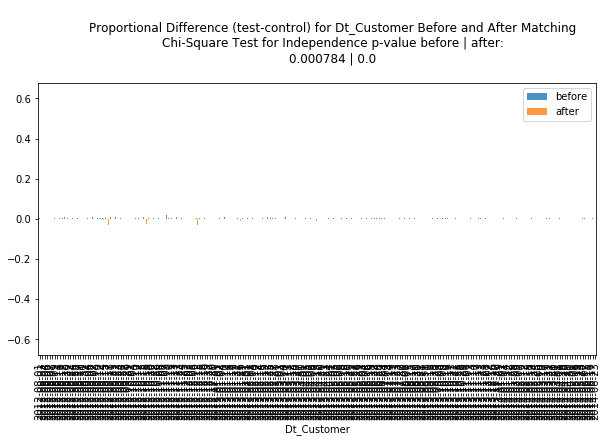

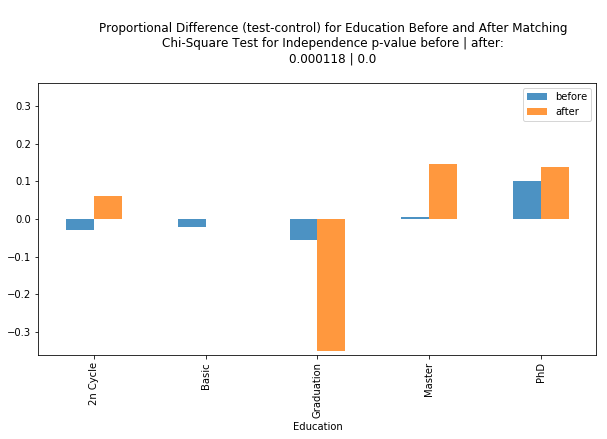

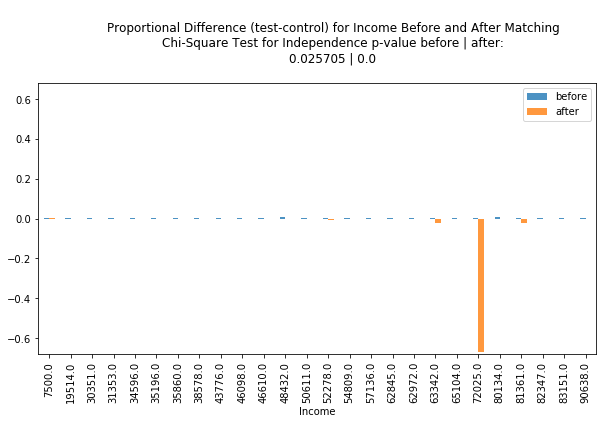

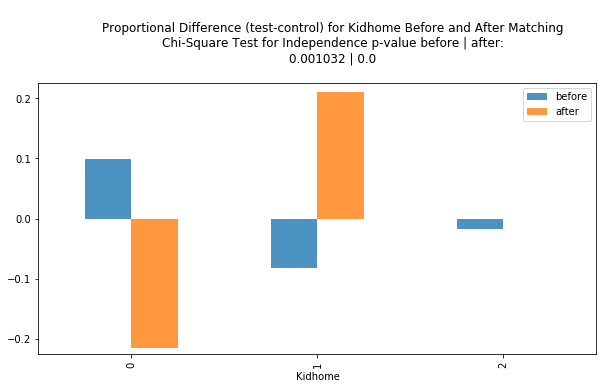

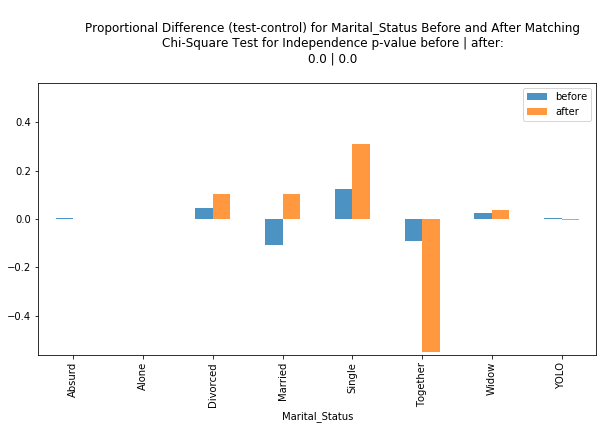

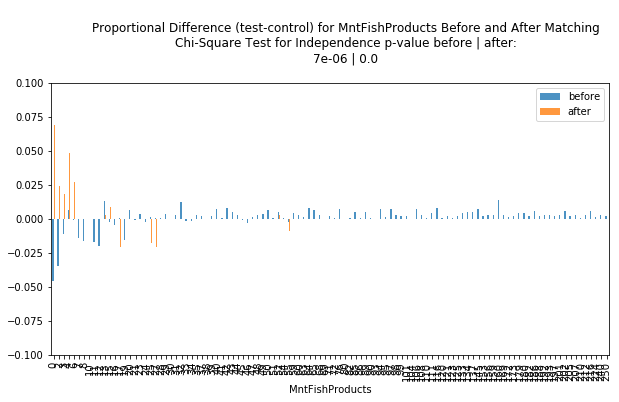

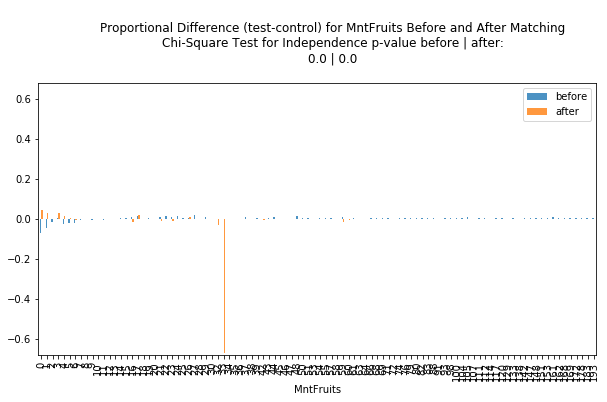

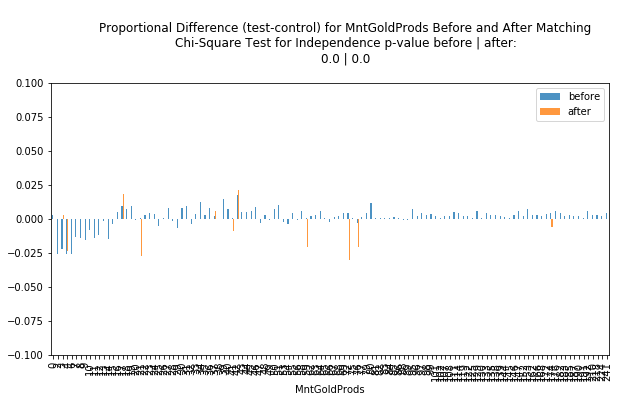

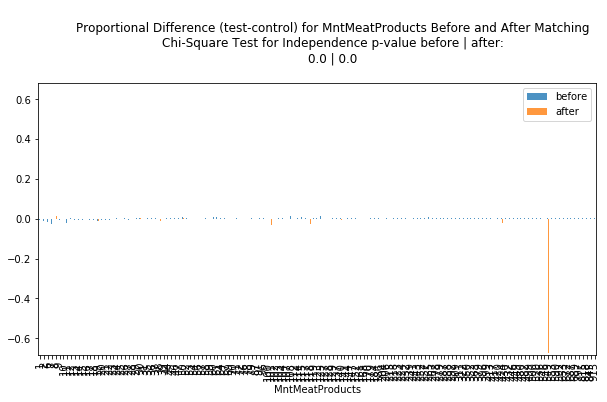

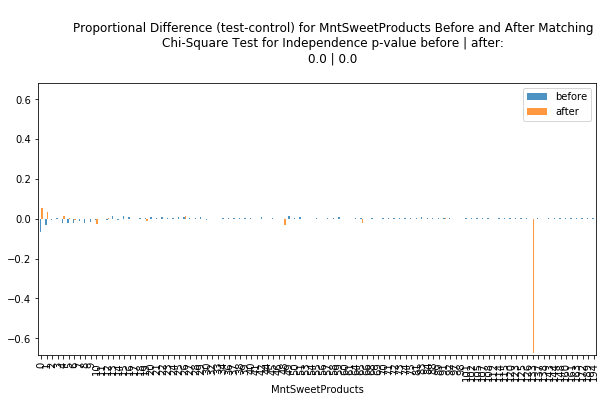

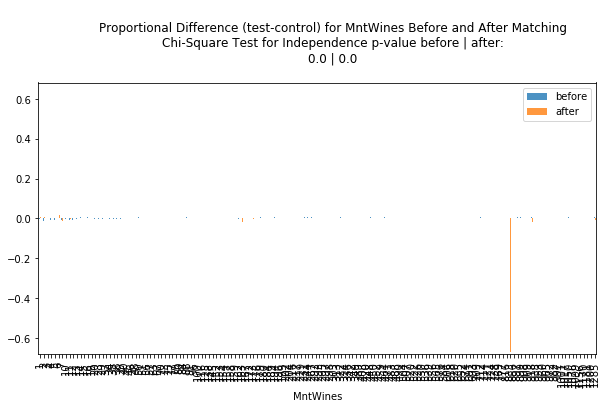

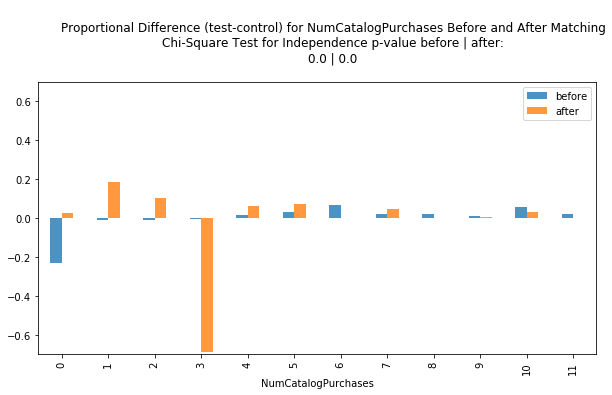

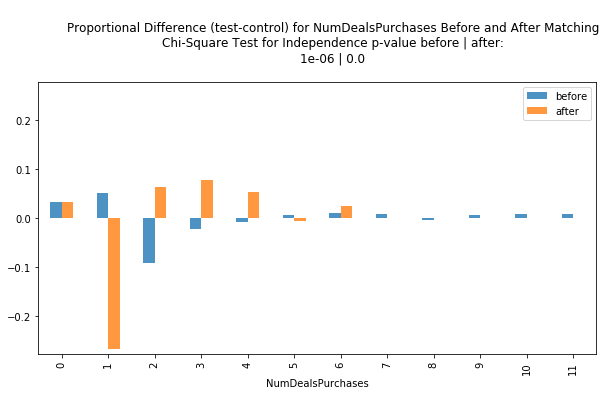

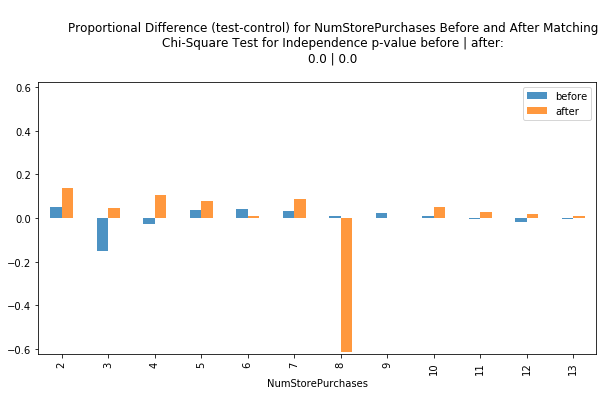

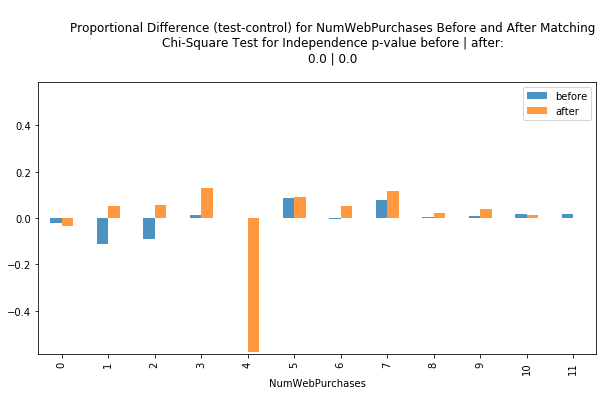

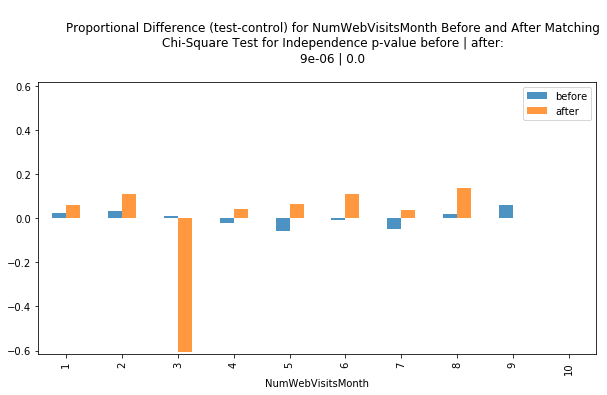

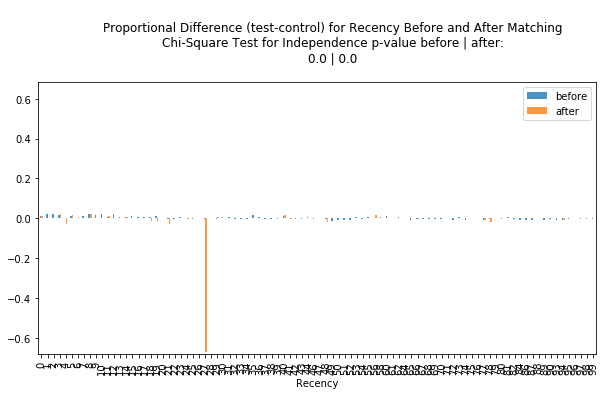

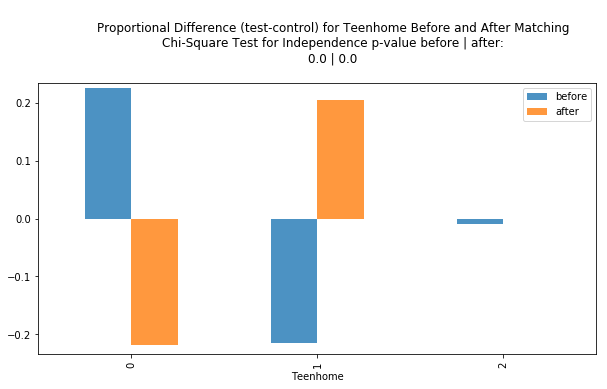

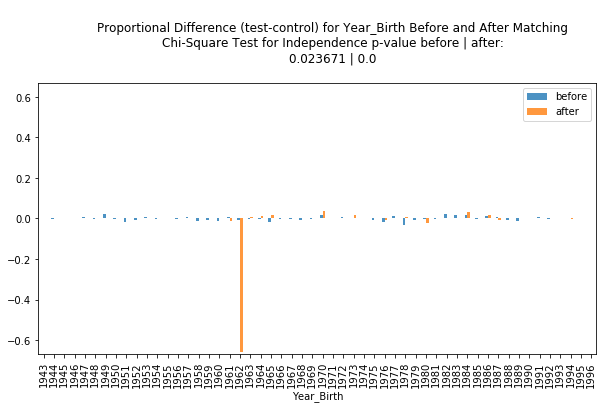

In [36]:
# Check to see if matches were good
categorical_results = m.compare_categorical(return_table=True)
